# Car_Price_Prediction_Assignment

### Step 1 : Data Reading, Understanding & Explorotation

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
# Importing the CarPrice_Assignment.csv dataset
cars = pd.read_csv("CarPrice_Assignment.csv")

In [4]:
# Check the head of the dataset
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
# summary of the dataset
cars.info()
# Here 205 rows, 26 columns, no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

#### Understanding the Data Dictionary

In [6]:
# symboling:  A value of +3 indicates that the auto is risky & -3 indicates that it is probably pretty safe
cars['symboling'].value_counts()
# Most cars are 0,1,2,3

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [7]:
# aspiration: An engine property showing whether oxygen intake is through standard or turbocharging
cars['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [8]:
# drivewheel: type of drive wheels like frontwheel, rarewheel or four-wheel drive 
cars['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

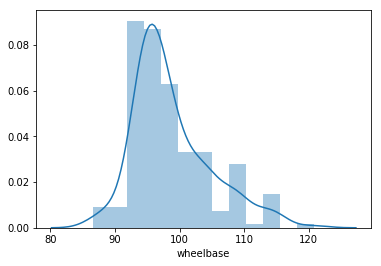

In [9]:
# wheelbase: Weelbase of car (distance between centre of front and rarewheels)
sns.distplot(cars['wheelbase'])
plt.show()

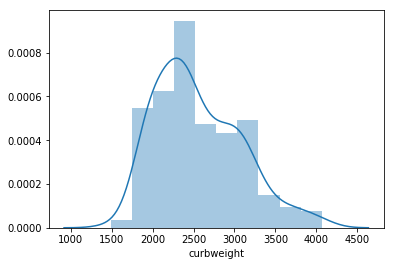

In [10]:
# curbweight: weight of car without occupants or baggage
sns.distplot(cars['curbweight'])
plt.show()

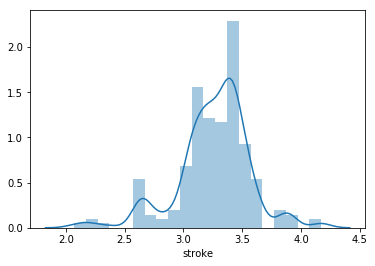

In [11]:
# stroke: volume of the engine (the distance traveled by the piston in each cycle)
sns.distplot(cars['stroke'])
plt.show()

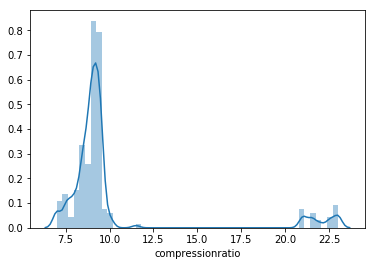

In [12]:
# compressionratio: compression ratio of car (ratio of volume of compression chamber) 
sns.distplot(cars['compressionratio'])
plt.show()

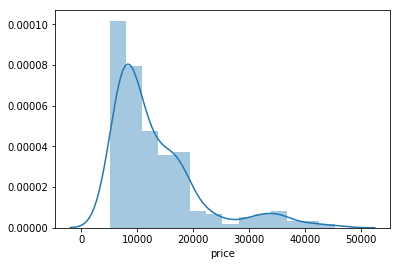

In [13]:
# price: price of car (Dependent variable)
sns.distplot(cars['price'])
plt.show()

#### Data Exploration
To perform linear regression, the (numeric) variable should be linearly related to at least one another numeric variable.

In [14]:
# all numeric (float and int) variables in the dataset
cars_numeric = cars.select_dtypes(include=['float64', 'int64'])
cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Here, the variable 'symboling' is integer but we treat it as categorical because it has only 6 discrete values. Also, we do not want 'car_ID'.

In [15]:
# drop 'symboling' and 'car_ID' 
cars_numeric = cars_numeric.drop(['symboling', 'car_ID'], axis=1)
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Then we plot a pairwise scatter plot to observe the linear relationships.

### Step 2 : Visualising the Data

<Figure size 1440x720 with 0 Axes>

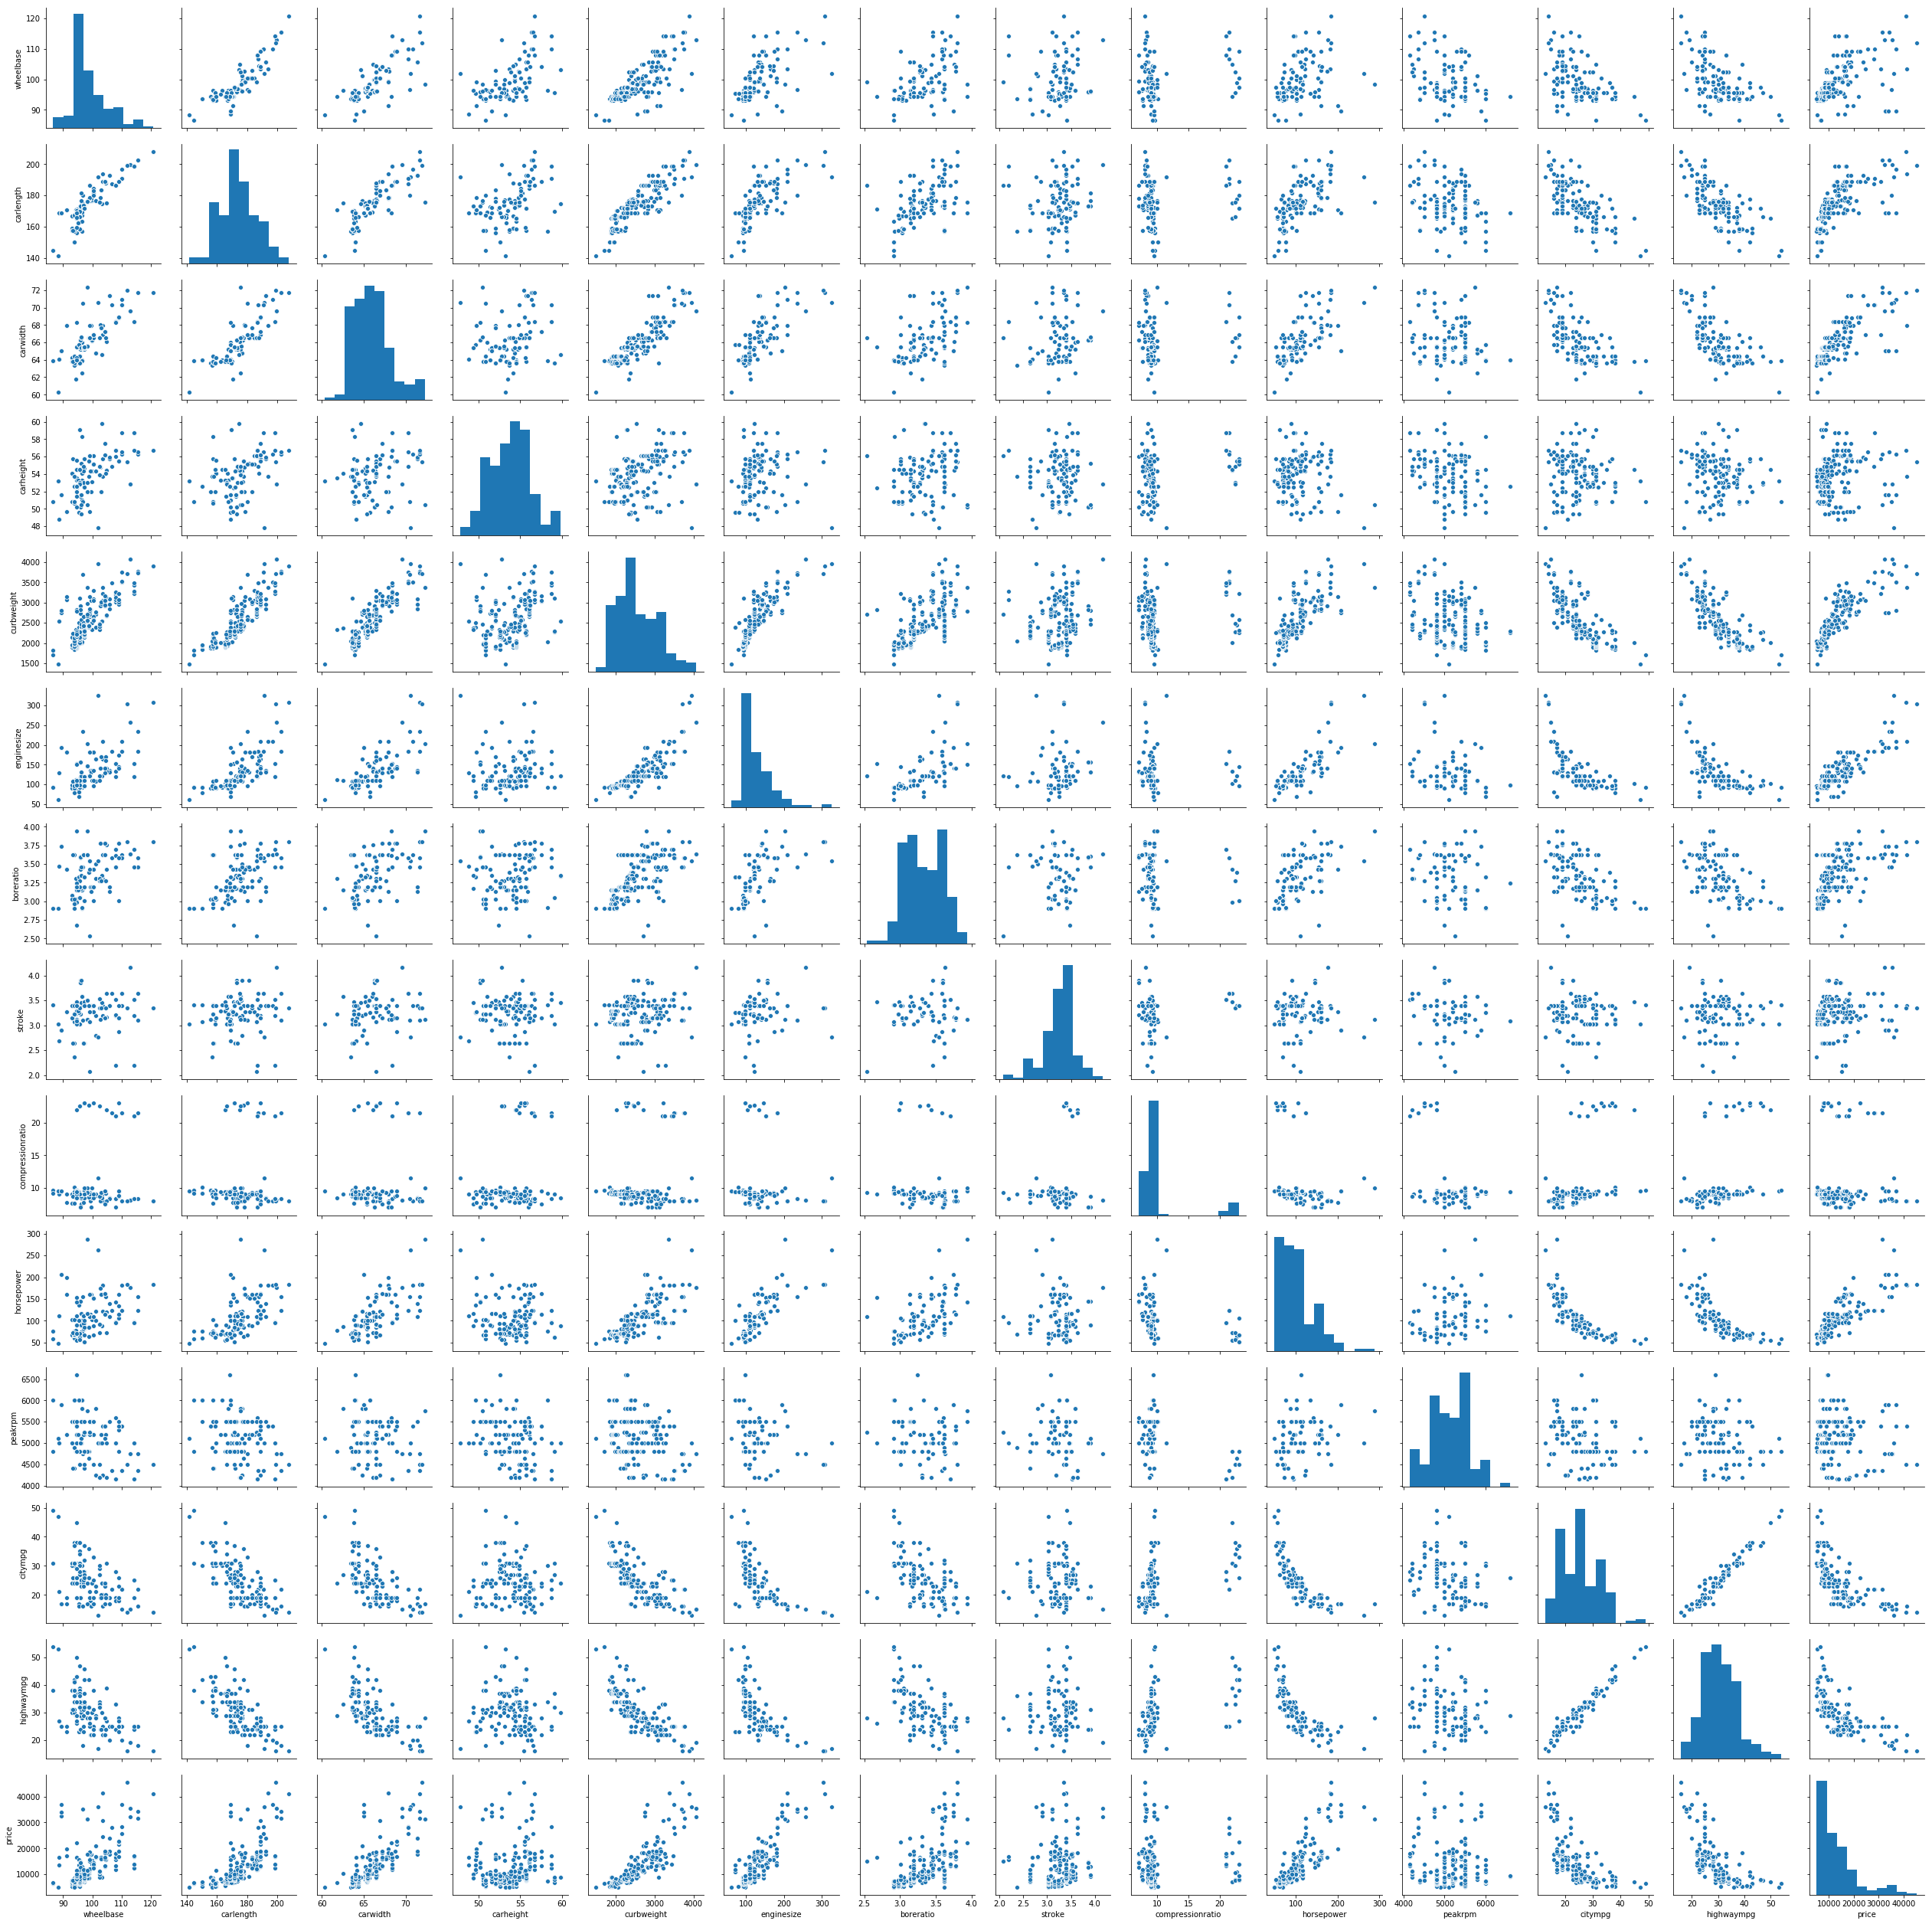

In [16]:
# paiwise scatter plot
plt.figure(figsize=(20, 10))
sns.pairplot(cars_numeric)
plt.show()

The graph is not so clear, so we can plot correlations between variables and plot a heatmap.

In [17]:
# correlation matrix
cor = cars_numeric.corr()
cor

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


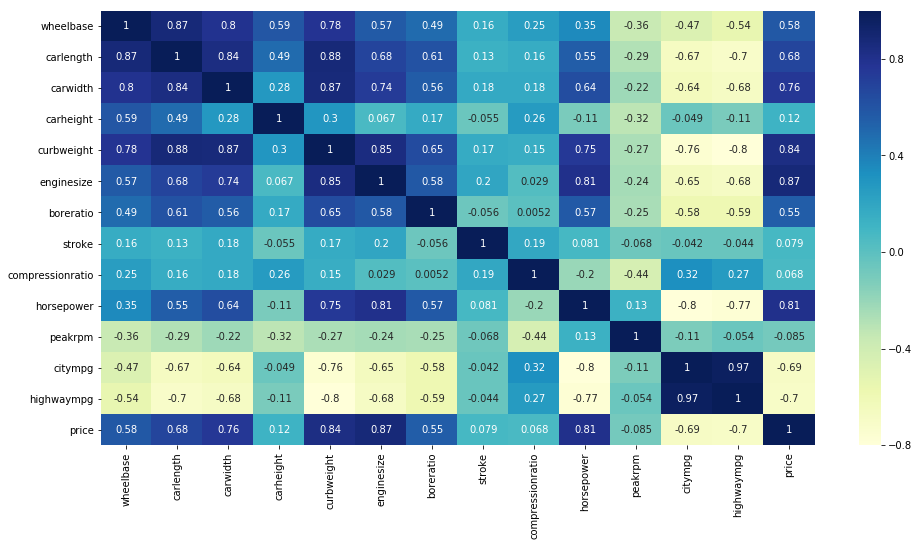

In [18]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))
# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

Correlation of price with independent variables:<br>
. Price is highly correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower<br>
. Price is negatively correlated to citympg and highwaympg

### Step 3 : Data Cleaning

. There are no missing values in the dataset.<br>
. Also the variables are in the correct format except 'symboling', which should be a categorical variable. So that dummy variable are created for the categories.

In [19]:
# check the variable formats
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [20]:
# convert 'symboling' to categorical
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null object
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm     

Then, we need to extract the company name from the column CarName.

In [21]:
# CarName: first few entries
cars['CarName'][:20]

0           alfa-romero giulia
1          alfa-romero stelvio
2     alfa-romero Quadrifoglio
3                  audi 100 ls
4                   audi 100ls
5                     audi fox
6                   audi 100ls
7                    audi 5000
8                    audi 4000
9          audi 5000s (diesel)
10                    bmw 320i
11                    bmw 320i
12                      bmw x1
13                      bmw x3
14                      bmw z4
15                      bmw x4
16                      bmw x5
17                      bmw x3
18            chevrolet impala
19       chevrolet monte carlo
Name: CarName, dtype: object

Here, the carname is occurs before a space. e.g. alfa-romero, audi, bmw, chevrolet etc. Then we have to extract the string before a space.

In [22]:
# Extracting carname using str.split() by space
carnames = cars['CarName'].apply(lambda x: x.split(" ")[0])
carnames[:20]

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
Name: CarName, dtype: object

Let's create a new column to store the compnay name and check whether it looks ok or not.

In [23]:
# New column 'car_company'
cars['car_company'] = cars['CarName'].apply(lambda x: x.split(" ")[0])

In [24]:
# look at all values 
cars['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
dodge           9
volkswagen      9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         4
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
maxda           2
vw              2
Nissan          1
toyouta         1
porcshce        1
vokswagen       1
mercury         1
Name: car_company, dtype: int64

Then we notice that some 'car-company' names are misspelled - vw and vokswagen should be volkswagen, porcshce should be porsche, toyouta should be toyota, Nissan should be nissan, maxda should be mazda etc.

Let's correct the data quality issue.

In [25]:
# Replacing misspelled 'car_company' names

# volkswagen
cars.loc[(cars['car_company'] == "vw") | (cars['car_company'] == "vokswagen") , 'car_company'] = 'volkswagen'

# porsche
cars.loc[cars['car_company'] == "porcshce", 'car_company'] = 'porsche'

# toyota
cars.loc[cars['car_company'] == "toyouta", 'car_company'] = 'toyota'

# nissan
cars.loc[cars['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
cars.loc[cars['car_company'] == "maxda", 'car_company'] = 'mazda'

In [26]:
cars['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: car_company, dtype: int64

Now the 'car_company' variable looks ok. Let's drop the variable 'CarName'.

In [27]:
# drop the variable 'CarName'
cars = cars.drop('CarName', axis=1)

In [28]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [29]:
# check the outliers
cars.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Step 4 : Data Preparation

In [30]:
# split into X and y
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength','carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber','enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg','car_company']]

y = cars['price']

#### Dummy Variables

Creating dummy variables for categorical variables.

In [31]:
# subset all categorical variables
cars_categorical = X.select_dtypes(include=['object'])
cars_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [32]:
# convert it into dummies
cars_dummies = pd.get_dummies(cars_categorical, drop_first=True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# drop categorical variables 
X = X.drop(list(cars_categorical.columns), axis=1)

In [34]:
# concat dummy variables with X
X = pd.concat([X, cars_dummies], axis=1)

In [35]:
# Now let's see the head of our dataframe.
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0


#### Rescaling the Features 

In [36]:
# storing column names in cols
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

C:\Users\lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'symboling_-1', 'symboling_0',
       'symboling_1', 'symboling_2', 'symboling_3', 'fueltype_gas',
       'aspiration_turbo', 'doornumber_two', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'car_company_audi',
       'car_company_bmw', 'car_company_buick', 'car_company_chevrolet',


### Step 5 : Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [37]:
# split into train and test
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

### Step 6: Building a Linear Model

In [38]:
# Building the first model with all the features

# instantiate
lm = LinearRegression()

# fit
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
# predict 
y_pred = lm.predict(X_test)

# metrics
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.838262139339907

We are getting approx. 83% r-squared with all the variables. <br>
Let's see how much we can get with lesser features.

#### Model Building Using RFE

Let's now build a model using recursive feature elimination to select features.

In [40]:
# RFE with 15 features
lm = LinearRegression()
rfe_15 = RFE(lm, 15)

# fit with 15 features
rfe_15.fit(X_train, y_train)

# Printing the boolean results
print(rfe_15.support_)           
print(rfe_15.ranking_)

[False False  True False  True  True  True  True False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False  True  True  True
 False  True  True  True False False False False False False False False
  True False False False False False False False False False False  True
 False  True False False False False False False]
[ 4  5  1  7  1  1  1  1  9 35 13 46 22 25 27 28 26 29 11  2 37 19  6 17
 18 48 23  1 33 47 24 20 38  1  1  1 32  1  1  1 14 44 10 52 45 50 53 36
  1 39 30 15 21 49 34 42 54  3 40  1 16  1 51  8 31 43 41 12]


In [41]:
# making predictions using rfe model
y_pred = rfe_15.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))

0.8941491916479423


In [42]:
# RFE with 6 features
lm = LinearRegression()
rfe_6 = RFE(lm, 6)

# fit with 6 features
rfe_6.fit(X_train, y_train)

# Printing the boolean results
print(rfe_6.support_)           
print(rfe_6.ranking_)

[False False  True False  True  True False False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False False False False
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False  True False False False False False False]
[13 14  1 16  1  1  2  4 18 44 22 55 31 34 36 37 35 38 20 11 46 28 15 26
 27 57 32  1 42 56 33 29 47  3  5  7 41  9  8  6 23 53 19 61 54 59 62 45
  1 48 39 24 30 58 43 51 63 12 49 10 25  1 60 17 40 52 50 21]


In [43]:
# predict
y_pred = rfe_6.predict(X_test)

# r-squared
print(r2_score(y_test, y_pred))

0.8851422877312572


Note that RFE with 6 features is giving about 88% r-squared, compared to 89% with 15 features.

#### Model Building Evaluation using statsmodels

In [44]:
# subset the features selected by rfe_15
col_15 = X_train.columns[rfe_15.support_]

# subsetting training data for 15 selected columns
X_train_rfe_15 = X_train[col_15]

# add a constant to the model
X_train_rfe_15 = sm.add_constant(X_train_rfe_15)
X_train_rfe_15.head()

,const,carwidth,curbweight,enginesize,boreratio,stroke,enginelocation_rear,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,car_company_bmw,car_company_peugeot,car_company_porsche
122,1.0,-0.984972,-0.701886,-0.695874,-1.331531,-0.081241,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.23812,-0.158114
125,1.0,1.117866,0.428245,0.579974,2.258638,-0.464834,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.23812,6.324555
166,1.0,-0.891512,-0.492032,-0.695874,-0.332206,-0.560733,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.23812,-0.158114
1,1.0,-0.844782,-0.014566,0.074449,0.519071,-1.839377,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.23812,-0.158114
199,1.0,0.603839,1.157921,0.074449,1.074252,-0.336970,-0.121867,-0.141069,-0.23812,0.537874,-0.070014,-0.070014,-0.141069,-0.201517,-0.23812,-0.158114


In [45]:
# fitting the model with 15 variables
lm_15 = sm.OLS(y_train, X_train_rfe_15).fit()   
print(lm_15.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     141.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.03e-70
Time:                        18:08:34   Log-Likelihood:                -1283.6
No. Observations:                 143   AIC:                             2597.
Df Residuals:                     128   BIC:                             2642.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.347e+

Note that the model with 15 variables gives about 93.9% r-squared, though that is on training data. The adjusted r-squared is 93.3.

In [46]:
# making predictions using rfe_15 sm model
X_test_rfe_15 = X_test[col_15]

# # Adding a constant variable 
X_test_rfe_15 = sm.add_constant(X_test_rfe_15, has_constant='add')
X_test_rfe_15.info()

# Making predictions
y_pred = lm_15.predict(X_test_rfe_15)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 16 columns):
const                    62 non-null float64
carwidth                 62 non-null float64
curbweight               62 non-null float64
enginesize               62 non-null float64
boreratio                62 non-null float64
stroke                   62 non-null float64
enginelocation_rear      62 non-null float64
enginetype_rotor         62 non-null float64
cylindernumber_five      62 non-null float64
cylindernumber_four      62 non-null float64
cylindernumber_three     62 non-null float64
cylindernumber_twelve    62 non-null float64
cylindernumber_two       62 non-null float64
car_company_bmw          62 non-null float64
car_company_peugeot      62 non-null float64
car_company_porsche      62 non-null float64
dtypes: float64(16)
memory usage: 8.2 KB


In [47]:
# r-squared
r2_score(y_test, y_pred)

0.8941491916479423

Thus, the test r-squared of model with 15 features is about 89.4%, while training is about 93%. <br>
Let's compare the same for the model with 6 features.

In [48]:
# subset the features selected by rfe_6
col_6 = X_train.columns[rfe_6.support_]

# subsetting training data for 6 selected columns
X_train_rfe_6 = X_train[col_6]

# add a constant to the model
X_train_rfe_6 = sm.add_constant(X_train_rfe_6)

# fitting the model with 6 variables
lm_6 = sm.OLS(y_train, X_train_rfe_6).fit()   
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     184.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.79e-63
Time:                        18:08:40   Log-Likelihood:                -1325.8
No. Observations:                 143   AIC:                             2666.
Df Residuals:                     136   BIC:                             2686.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.339e+04    

Note that the model with 6 variables gives about 89.1% r-squared, though that is on training data. The adjusted r-squared is 88.6.

In [49]:
# making predictions using rfe_6 sm model
X_test_rfe_6 = X_test[col_6]

# Adding a constant  
X_test_rfe_6 = sm.add_constant(X_test_rfe_6, has_constant='add')
X_test_rfe_6.info()

# Making predictions
y_pred = lm_6.predict(X_test_rfe_6)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 160 to 128
Data columns (total 7 columns):
const                  62 non-null float64
carwidth               62 non-null float64
curbweight             62 non-null float64
enginesize             62 non-null float64
enginelocation_rear    62 non-null float64
car_company_bmw        62 non-null float64
car_company_porsche    62 non-null float64
dtypes: float64(7)
memory usage: 3.9 KB


In [50]:
# r2_score for 6 variables
r2_score(y_test, y_pred)

0.885142287731257

Thus, the test r-squared of model with 6 features is about 88.5%, while training is about 88.6%. 

#### Choosing the Optimal number of features

We have seen that, as we go from 15 to 6 features the adjusted r-squared varies from about 93.3 to 88.<br>
Now we make a plot between n_features and adjusted r-squared, and then choose the value of n_features.

In [51]:
n_features_list = list(range(4, 20))
adjusted_r2 = []
r2 = []
test_r2 = []

for n_features in range(4, 20):
    
    # RFE with n features
    lm = LinearRegression()

    # specify number of features
    rfe_n = RFE(lm, n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # subset the features selected by rfe_6
    col_n = X_train.columns[rfe_n.support_]

    # subsetting training data for 6 selected columns
    X_train_rfe_n = X_train[col_n]

    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)

    # fitting the model with 6 variables
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    adjusted_r2.append(lm_n.rsquared_adj)
    r2.append(lm_n.rsquared)
    
    # making predictions using rfe_15 sm model
    X_test_rfe_n = X_test[col_n]

    # Adding a constant variable 
    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    # Making predictions
    y_pred = lm_n.predict(X_test_rfe_n)
    
    test_r2.append(r2_score(y_test, y_pred))

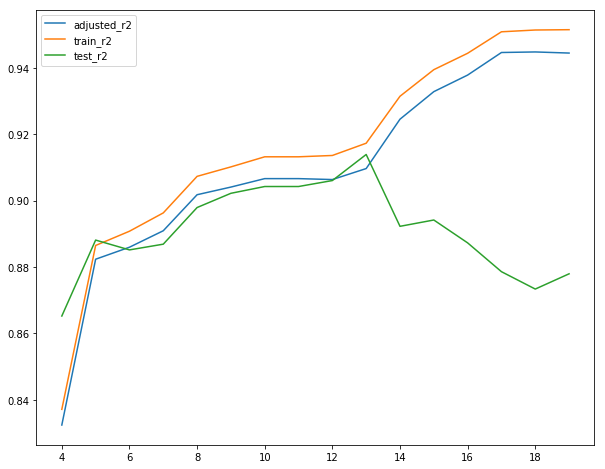

In [52]:
# plotting adjusted_r2 against n_features
plt.figure(figsize=(10, 8))
plt.plot(n_features_list, adjusted_r2, label="adjusted_r2")
plt.plot(n_features_list, r2, label="train_r2")
plt.plot(n_features_list, test_r2, label="test_r2")
plt.legend(loc='upper left')
plt.show()

Based on the plot, we can choose the number of features considering the r2_score.<br>
we can choose anything between 4 and 12 features because above 12, the test r2 goes down and at lesser than 4, the r2_score is too less.<br>
Here, the test_r2 score doesn't increase much from n=6 to n=12. So we choose a simpler model(n=6).

#### Final Model

Now build the final model with 6 features.

In [53]:
# RFE with n features
lm = LinearRegression()

n_features = 6

# specify number of features
rfe_n = RFE(lm, n_features)

# fit with n features
rfe_n.fit(X_train, y_train)

# subset the features selected by rfe_6
col_n = X_train.columns[rfe_n.support_]

# subsetting training data for 6 selected columns
X_train_rfe_n = X_train[col_n]

# add a constant to the model
X_train_rfe_n = sm.add_constant(X_train_rfe_n)

# fitting the model with 6 variables
lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
adjusted_r2.append(lm_n.rsquared_adj)
r2.append(lm_n.rsquared)

# making predictions using rfe_15 sm model
X_test_rfe_n = X_test[col_n]

# Adding a constant variable 
X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

# Making predictions
y_pred = lm_n.predict(X_test_rfe_n)

test_r2.append(r2_score(y_test, y_pred))

In [54]:
# summary
lm_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     184.8
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           7.79e-63
Time:                        18:08:54   Log-Likelihood:                -1325.8
No. Observations:                 143   AIC:                             2666.
Df Residuals:                     136   BIC:                             2686.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.339e+04    221.912     60.350      0.000     1.3e+04    1.38e+04
carwidth             2022.5954    467.095      4.330      0.000    1098.886    2946.305
curbweight           2280.5711    582.682      3.914      0.000    1128.283    3432.860
enginesize           2455.4132    470.374      5.220      0.000    1525.219    3385.607
enginelocation_rear  1526.3407    406.639      3.754      0.000     722.187    2330.495
car_company_bmw      1755.2549    222.194      7.900      0.000    1315.853    2194.657
car_company_porsche   707.8462    306.321      2.311      0.022     102.077    1313.615
==============================================================================
Omnibus:                        8.829   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                9.273
Skew:                           0.478   Prob(JB):                      0.00969
Kurtosis:                       3.801   Cond. No.                         5.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# results 
r2_score(y_test, y_pred)

0.885142287731257

### Step 7 : Model Evaluation

Now we can evaluate the model in terms of its assumptions. 

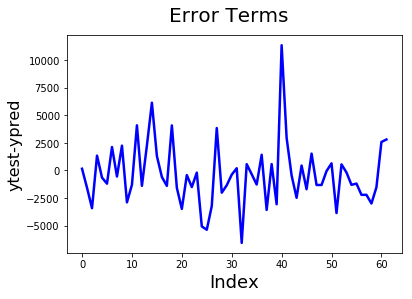

In [56]:
# Error terms
c = [i for i in range(len(y_pred))]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('ytest-ypred', fontsize=16)               
plt.show()

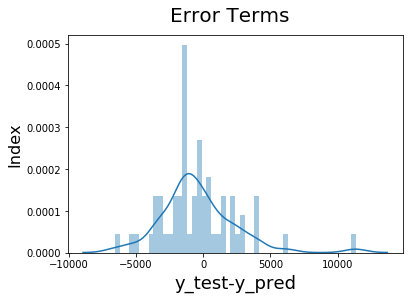

In [57]:
# Plotting the error terms
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  
plt.xlabel('y_test-y_pred', fontsize=18)                  
plt.ylabel('Index', fontsize=16)                          
plt.show()

In [58]:
# mean
np.mean(y_test-y_pred)

-382.73632450276716

Here the mean is not 0, now we compared to the scale of 'price'.

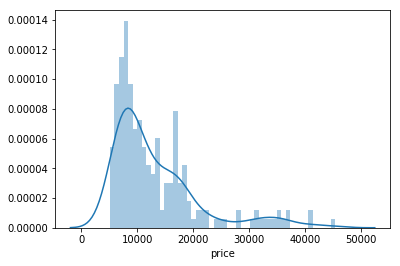

In [59]:
sns.distplot(cars['price'],bins=50)
plt.show()

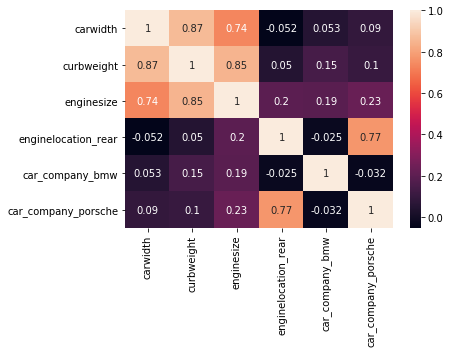

In [60]:
# check the multicollinearity
predictors = ['carwidth', 'curbweight', 'enginesize', 
             'enginelocation_rear', 'car_company_bmw', 'car_company_porsche']

cors = X.loc[:, list(predictors)].corr()
sns.heatmap(cors, annot=True)
plt.show()

This is the final model which consists of the 6 variables.